In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
# load new merged dataset
df = pd.read_csv("resumes_with_labels.csv")
#df.head(), df.shape

In [38]:
#only keep text and label for this
df = df[["text", "got_internship"]].dropna()

#train test split
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["got_internship"], test_size = 0.2, random_state = 42, stratify = df["got_internship"]
)
  
len(X_train), len(X_test)

(129, 33)

accuracy:  0.6060606060606061
f1:  0.6976744186046512

classification report:
               precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.65      0.75      0.70        20

    accuracy                           0.61        33
   macro avg       0.58      0.57      0.57        33
weighted avg       0.59      0.61      0.59        33



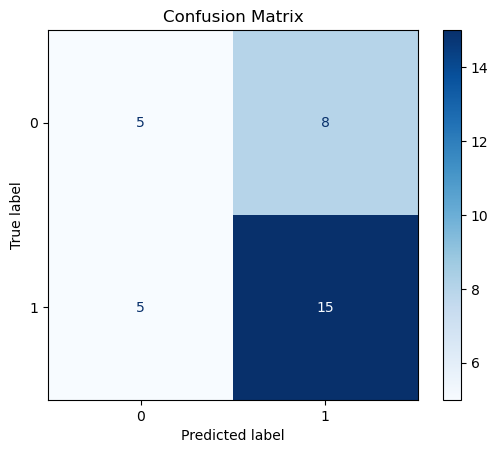

In [39]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#vectorize text
vectorizer = TfidfVectorizer(stop_words = "english", sublinear_tf = True, max_features = 5000, ngram_range = (1, 2), min_df = 3)
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)
# train model
clf = LogisticRegression(max_iter = 2000, solver = "liblinear", class_weight = "balanced")
clf.fit(X_train_vector, y_train)

y_prediction = clf.predict(X_test_vector)
print("accuracy: ", accuracy_score(y_test, y_prediction))
print("f1: ", f1_score(y_test, y_prediction))
print("\nclassification report:\n", classification_report(y_test, y_prediction))

#conf_matrix = confusion_matrix(y_test, y_prediction)
#print("confusion matrix: ", conf_matrix)
ConfusionMatrixDisplay.from_predictions(y_test, y_prediction, cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()


LinearSVC:
accuracy:  0.606
f1:  0.698
report:
               precision    recall  f1-score   support

           0      0.500     0.385     0.435        13
           1      0.652     0.750     0.698        20

    accuracy                          0.606        33
   macro avg      0.576     0.567     0.566        33
weighted avg      0.592     0.606     0.594        33



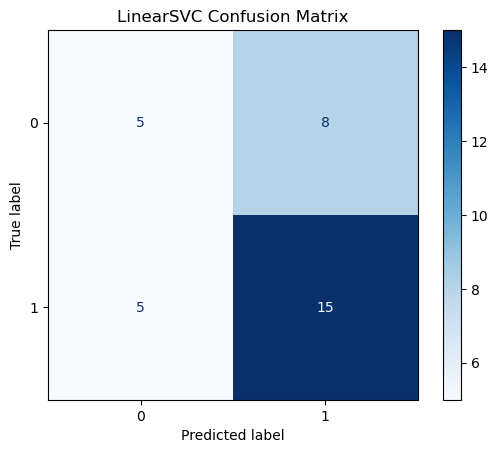

In [40]:
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
# different linear model: LinearSVC
svm = LinearSVC(C=0.7, class_weight="balanced", random_state=42)
svm.fit(X_train_vector, y_train)
y_pred_svm = svm.predict(X_test_vector)

print("LinearSVC:")
print("accuracy: ", round(accuracy_score(y_test, y_pred_svm), 3))
print("f1: ", round(f1_score(y_test, y_pred_svm), 3))
print("report:\n", classification_report(y_test, y_pred_svm, digits=3))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, cmap="Blues", values_format="d")
plt.title("LinearSVC Confusion Matrix")
plt.show()